# 代表的なコピュラ

## 準備

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from statsmodels.distributions.copula.api import IndependenceCopula, ClaytonCopula, GumbelCopula, FrankCopula, GaussianCopula, StudentTCopula

import warnings
warnings.simplefilter('ignore')

In [2]:
# パラメータの設定
tau = 0.75  # ケンドールの順位相関係数

In [3]:
# ケンドールの順位相関係数に対応したパラメータを計算(積コピュラは除く)
Clayton_theta = ClaytonCopula().theta_from_tau(tau)
Gumbel_theta = GumbelCopula().theta_from_tau(tau)
Frank_theta = FrankCopula().theta_from_tau(tau)
Gaussian_corr = GaussianCopula().corr_from_tau(tau)
StudentT_corr = StudentTCopula().corr_from_tau(tau)

In [4]:
# 各コピュラのインスタンスを作成
Independence = IndependenceCopula()  # 積コピュラ
Clayton = ClaytonCopula(theta=Clayton_theta)  # クレイトンコピュラ
Gumbel = GumbelCopula(theta=Gumbel_theta)  # ガンベルコピュラ
Frank = FrankCopula(theta=Frank_theta)  # フランクコピュラ
Gaussian = GaussianCopula(corr=Gaussian_corr)  # 正規コピュラ
StudentT = StudentTCopula(corr=StudentT_corr, df=3)  # tコピュラ

## コピュラの密度関数

In [5]:
# コピュラの密度関数c(u1,u2)を求める
# (u1,u2)平面でのメッシュを作成
n_points = 201
u1 = np.linspace(0, 1, n_points)
u2 = np.linspace(0, 1, n_points)
u1_mesh, u2_mesh = np.meshgrid(u1, u2)
u = np.c_[u1_mesh.flatten(), u2_mesh.flatten()]

# 各インスタンスから密度関数c(u1,u2)を数値計算
Independence_PDF = Independence.pdf(u).reshape(n_points, n_points)
Clayton_PDF = Clayton.pdf(u).reshape(n_points, n_points)
Gumbel_PDF = Gumbel.pdf(u).reshape(n_points, n_points)
Frank_PDF = Frank.pdf(u).reshape(n_points, n_points)
Gaussian_PDF = Gaussian.pdf(u).reshape(n_points, n_points)
StudentT_PDF = StudentT.pdf(u).reshape(n_points, n_points)

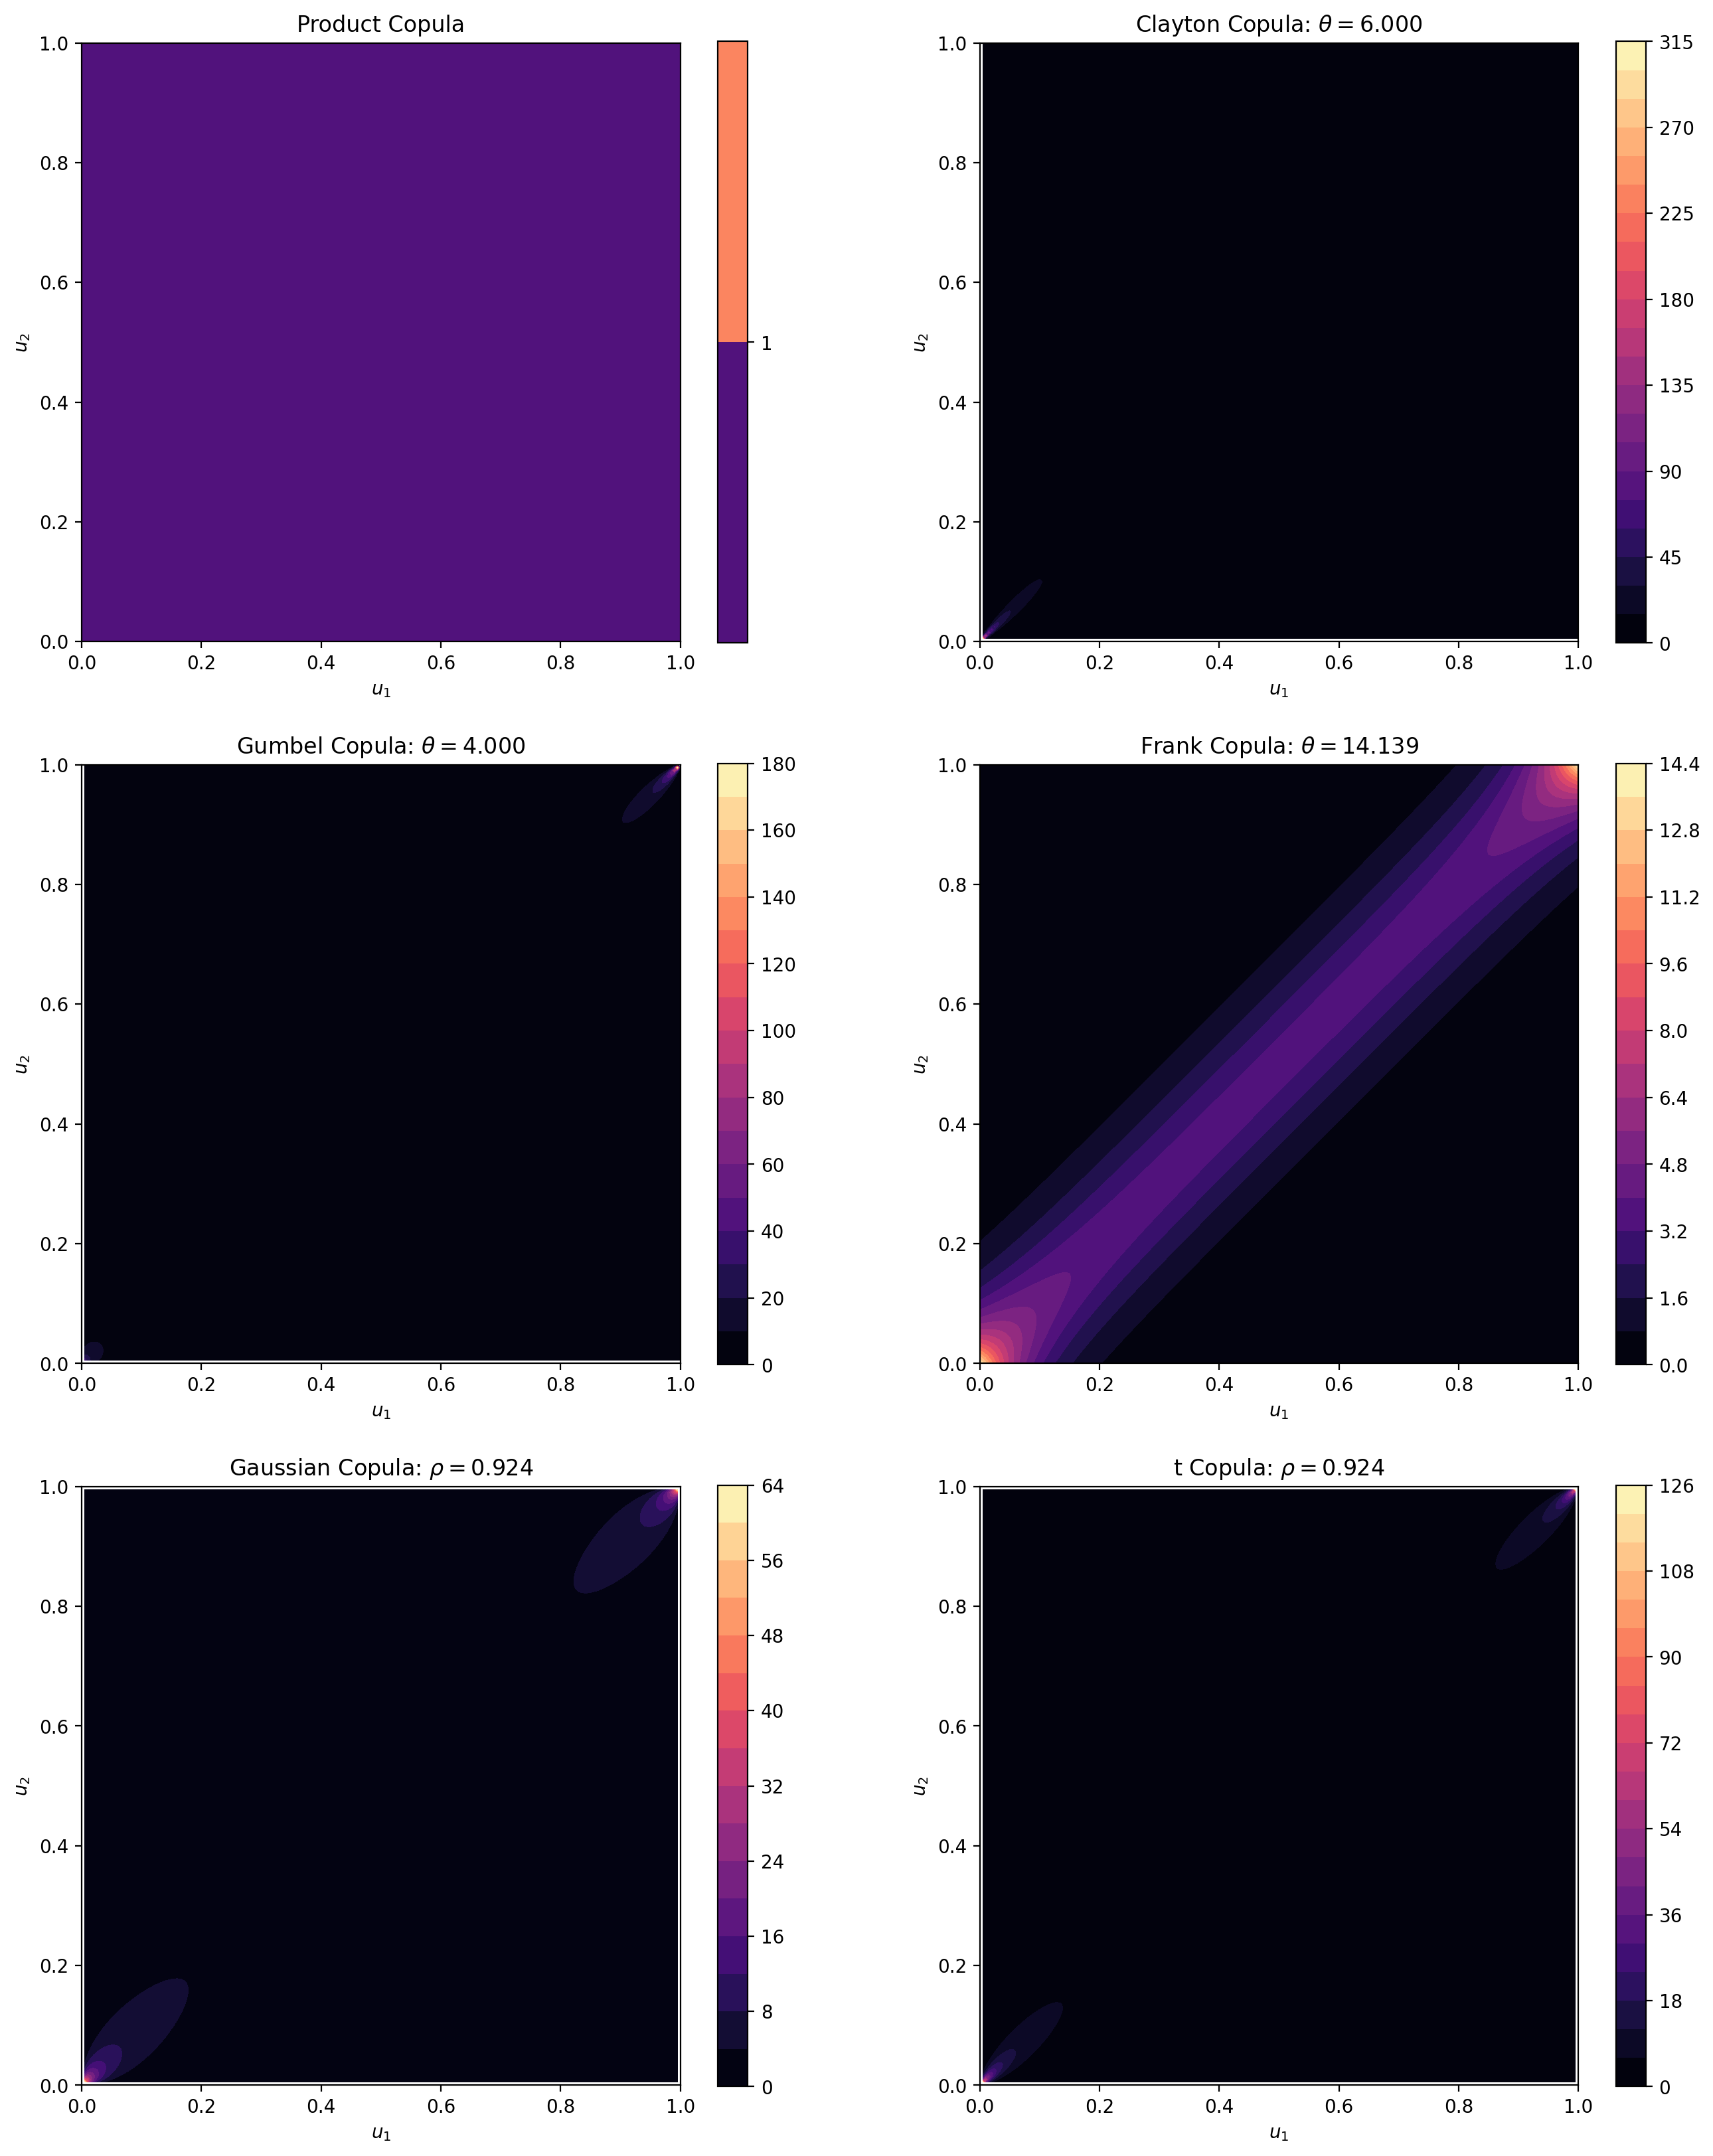

In [6]:
# コピュラの密度関数c(u1,u2)をプロット
plt.figure(figsize=[16,20], dpi=200)

plt.subplot(321)
plt.contourf(u1_mesh, u2_mesh, Independence_PDF, cmap='magma', levels=20)
plt.title('Product Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar(ticks=[1])

plt.subplot(322)
plt.contourf(u1_mesh, u2_mesh, Clayton_PDF, cmap='magma', levels=20)
plt.title('Clayton Copula: ' + r'$\theta=$' + f'{Clayton_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(323)
plt.contourf(u1_mesh, u2_mesh, Gumbel_PDF, cmap='magma', levels=20)
plt.title('Gumbel Copula: ' + r'$\theta=$' + f'{Gumbel_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(324)
plt.contourf(u1_mesh, u2_mesh, Frank_PDF, cmap='magma', levels=20)
plt.title('Frank Copula: ' + r'$\theta=$' + f'{Frank_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(325)
plt.contourf(u1_mesh, u2_mesh, Gaussian_PDF, cmap='magma', levels=20)
plt.title('Gaussian Copula: ' + r'$\rho=$' + f'{Gaussian_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(326)
plt.contourf(u1_mesh, u2_mesh, StudentT_PDF, cmap='magma', levels=20)
plt.title('t Copula: ' + r'$\rho=$' + f'{StudentT_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.savefig('Copula_PDF.pdf')
plt.show()

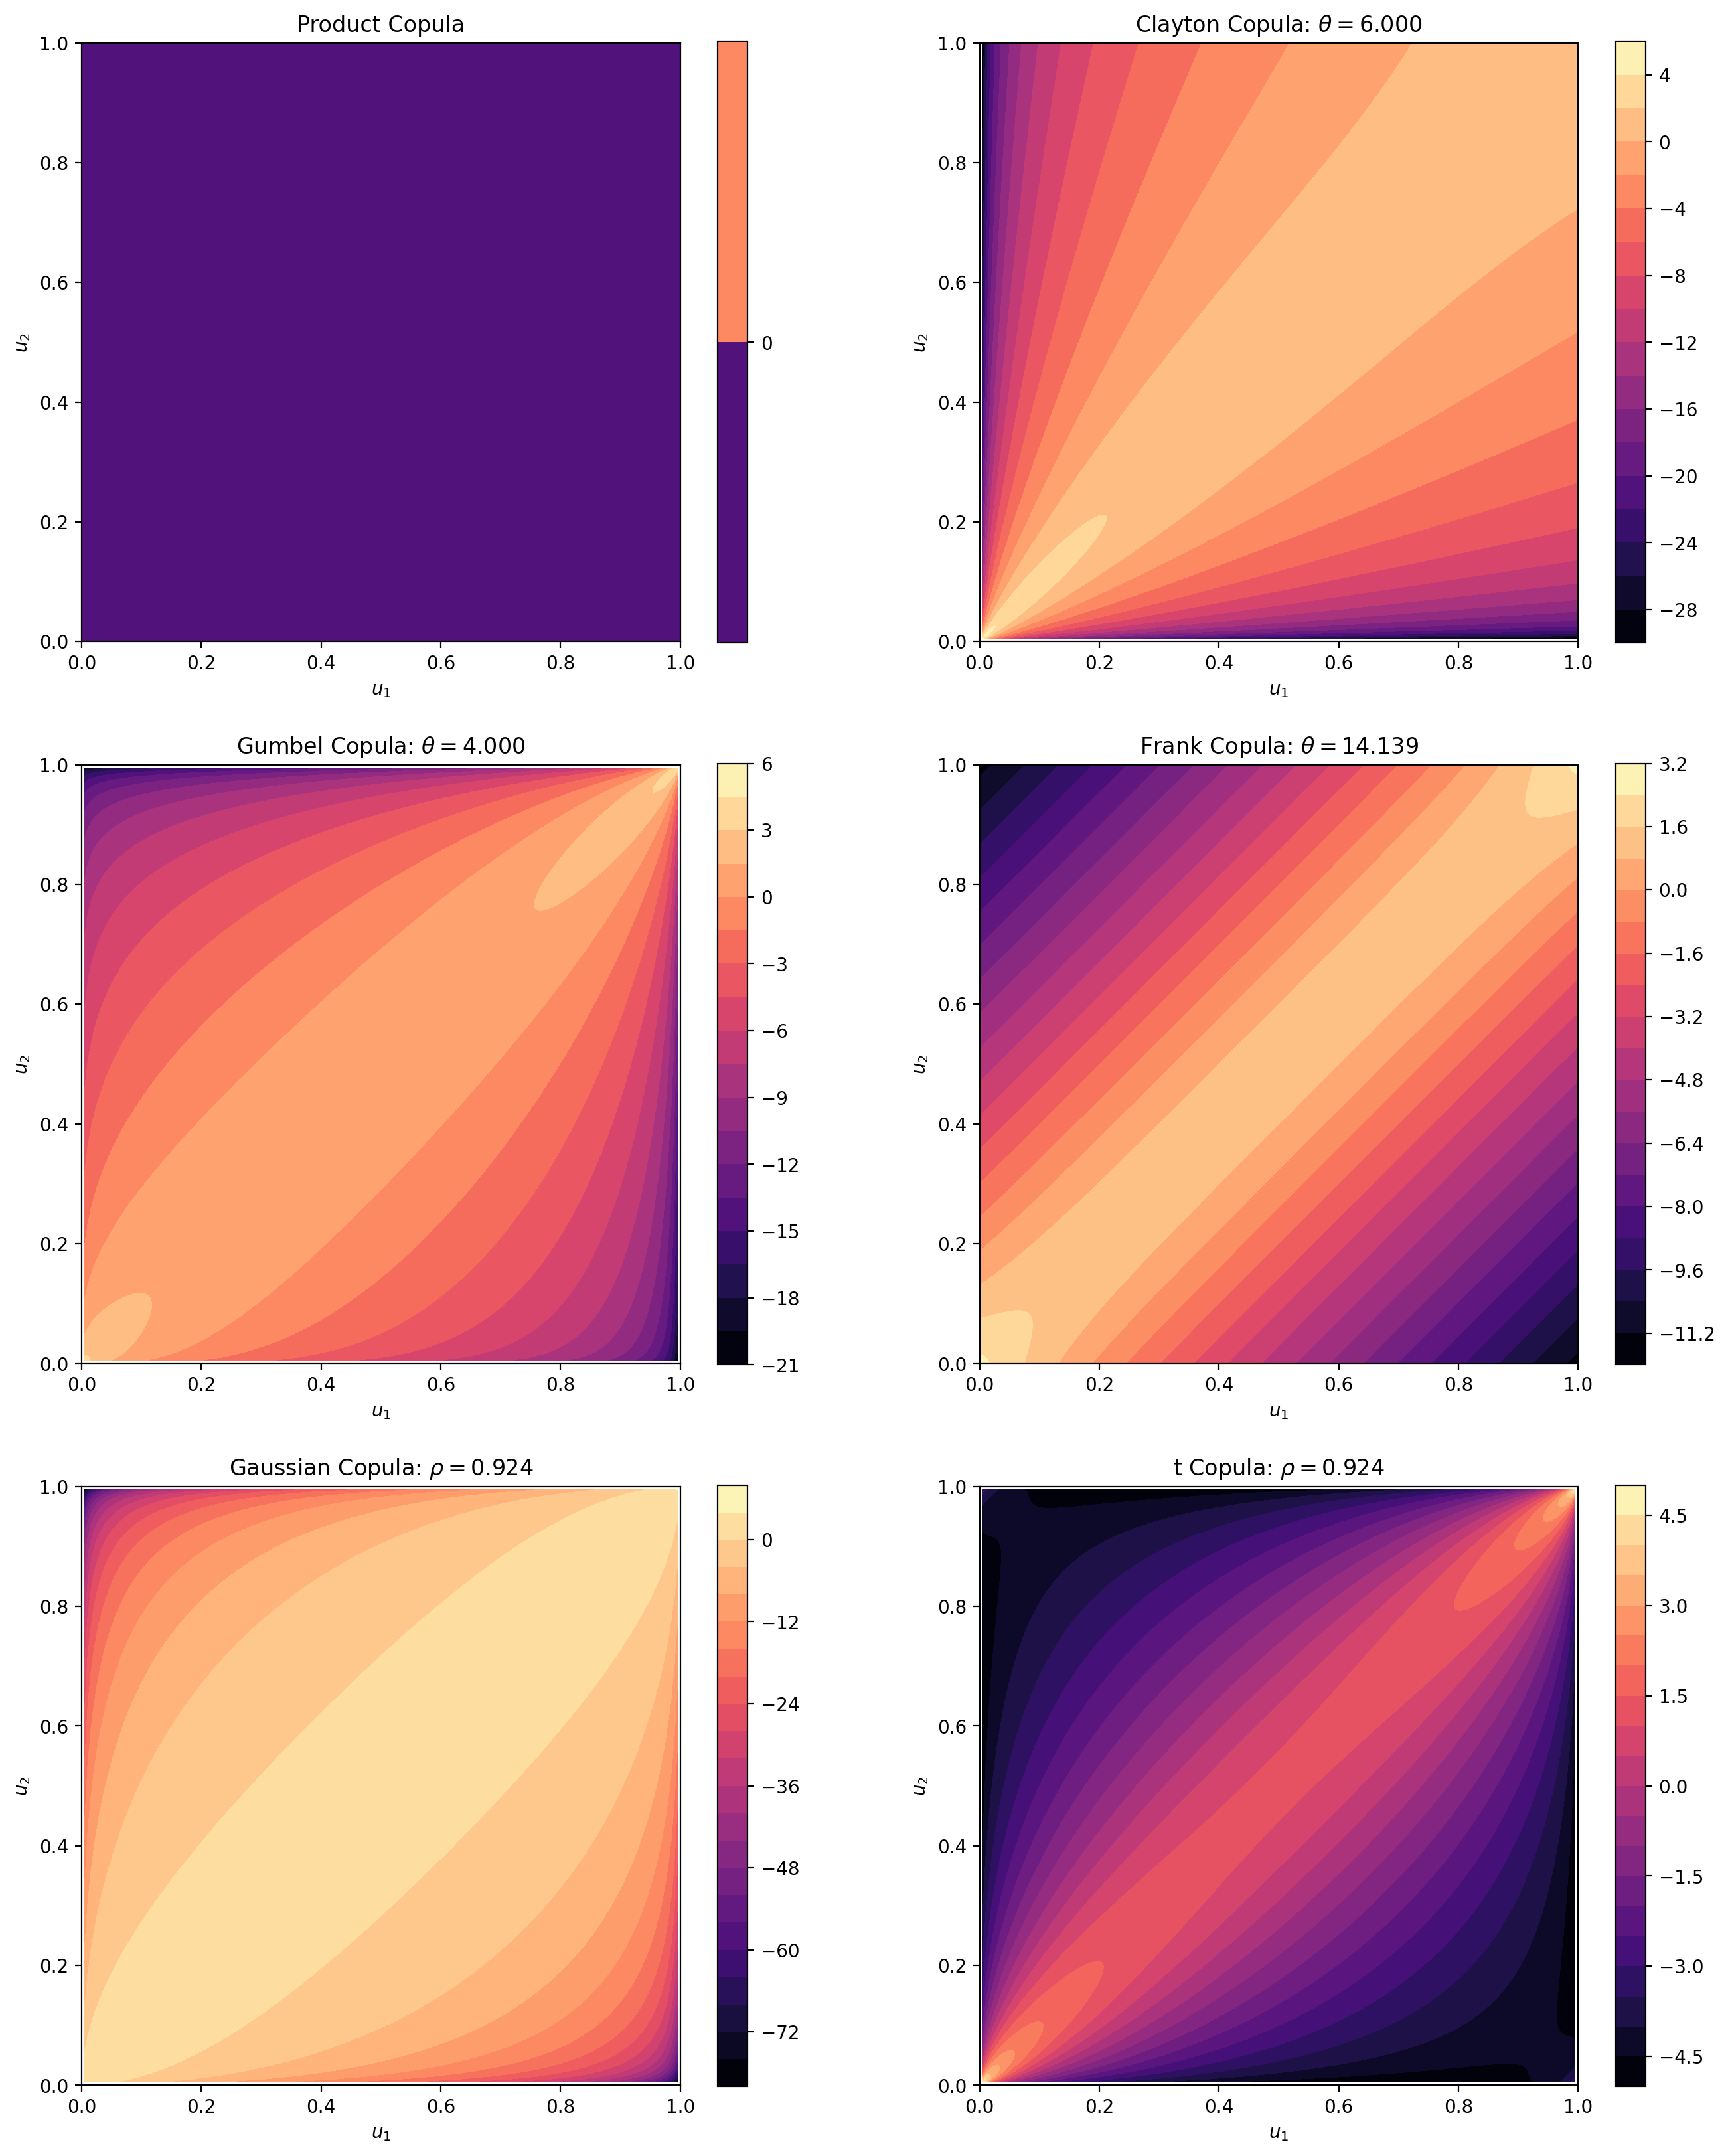

In [7]:
# コピュラの密度関数の対数logc(u1,u2)をプロット
plt.figure(figsize=[16,20], dpi=200)

plt.subplot(321)
plt.contourf(u1_mesh, u2_mesh, np.log(Independence_PDF), cmap='magma', levels=20)
plt.title('Product Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar(ticks=[0])

plt.subplot(322)
plt.contourf(u1_mesh, u2_mesh, np.log(Clayton_PDF), cmap='magma', levels=20)
plt.title('Clayton Copula: ' + r'$\theta=$' + f'{Clayton_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(323)
plt.contourf(u1_mesh, u2_mesh, np.log(Gumbel_PDF), cmap='magma', levels=20)
plt.title('Gumbel Copula: ' + r'$\theta=$' + f'{Gumbel_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(324)
plt.contourf(u1_mesh, u2_mesh, np.log(Frank_PDF), cmap='magma', levels=20)
plt.title('Frank Copula: ' + r'$\theta=$' + f'{Frank_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(325)
plt.contourf(u1_mesh, u2_mesh, np.log(Gaussian_PDF), cmap='magma', levels=20)
plt.title('Gaussian Copula: ' + r'$\rho=$' + f'{Gaussian_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.subplot(326)
plt.contourf(u1_mesh, u2_mesh, np.log(StudentT_PDF), cmap='magma', levels=20)
plt.title('t Copula: ' + r'$\rho=$' + f'{StudentT_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.colorbar()

plt.savefig('Copula_logPDF.pdf')
plt.show()

## コピュラの密度関数に従う乱数

In [8]:
# コピュラの密度関数c(u1,u2)に従う乱数を生成
nobs = 1000  # サンプル数
random_state = 0  # 乱数の種


# 各インスタンスから乱数を生成
Independence_RVS = Independence.rvs(nobs=nobs, random_state=random_state)
Clayton_RVS = Clayton.rvs(nobs=nobs, random_state=random_state)
Gumbel_RVS = Gumbel.rvs(nobs=nobs, random_state=random_state)
Frank_RVS = Frank.rvs(nobs=nobs, random_state=random_state)
Gaussian_RVS = Gaussian.rvs(nobs=nobs, random_state=random_state)
StudentT_RVS = StudentT.rvs(nobs=nobs, random_state=random_state)

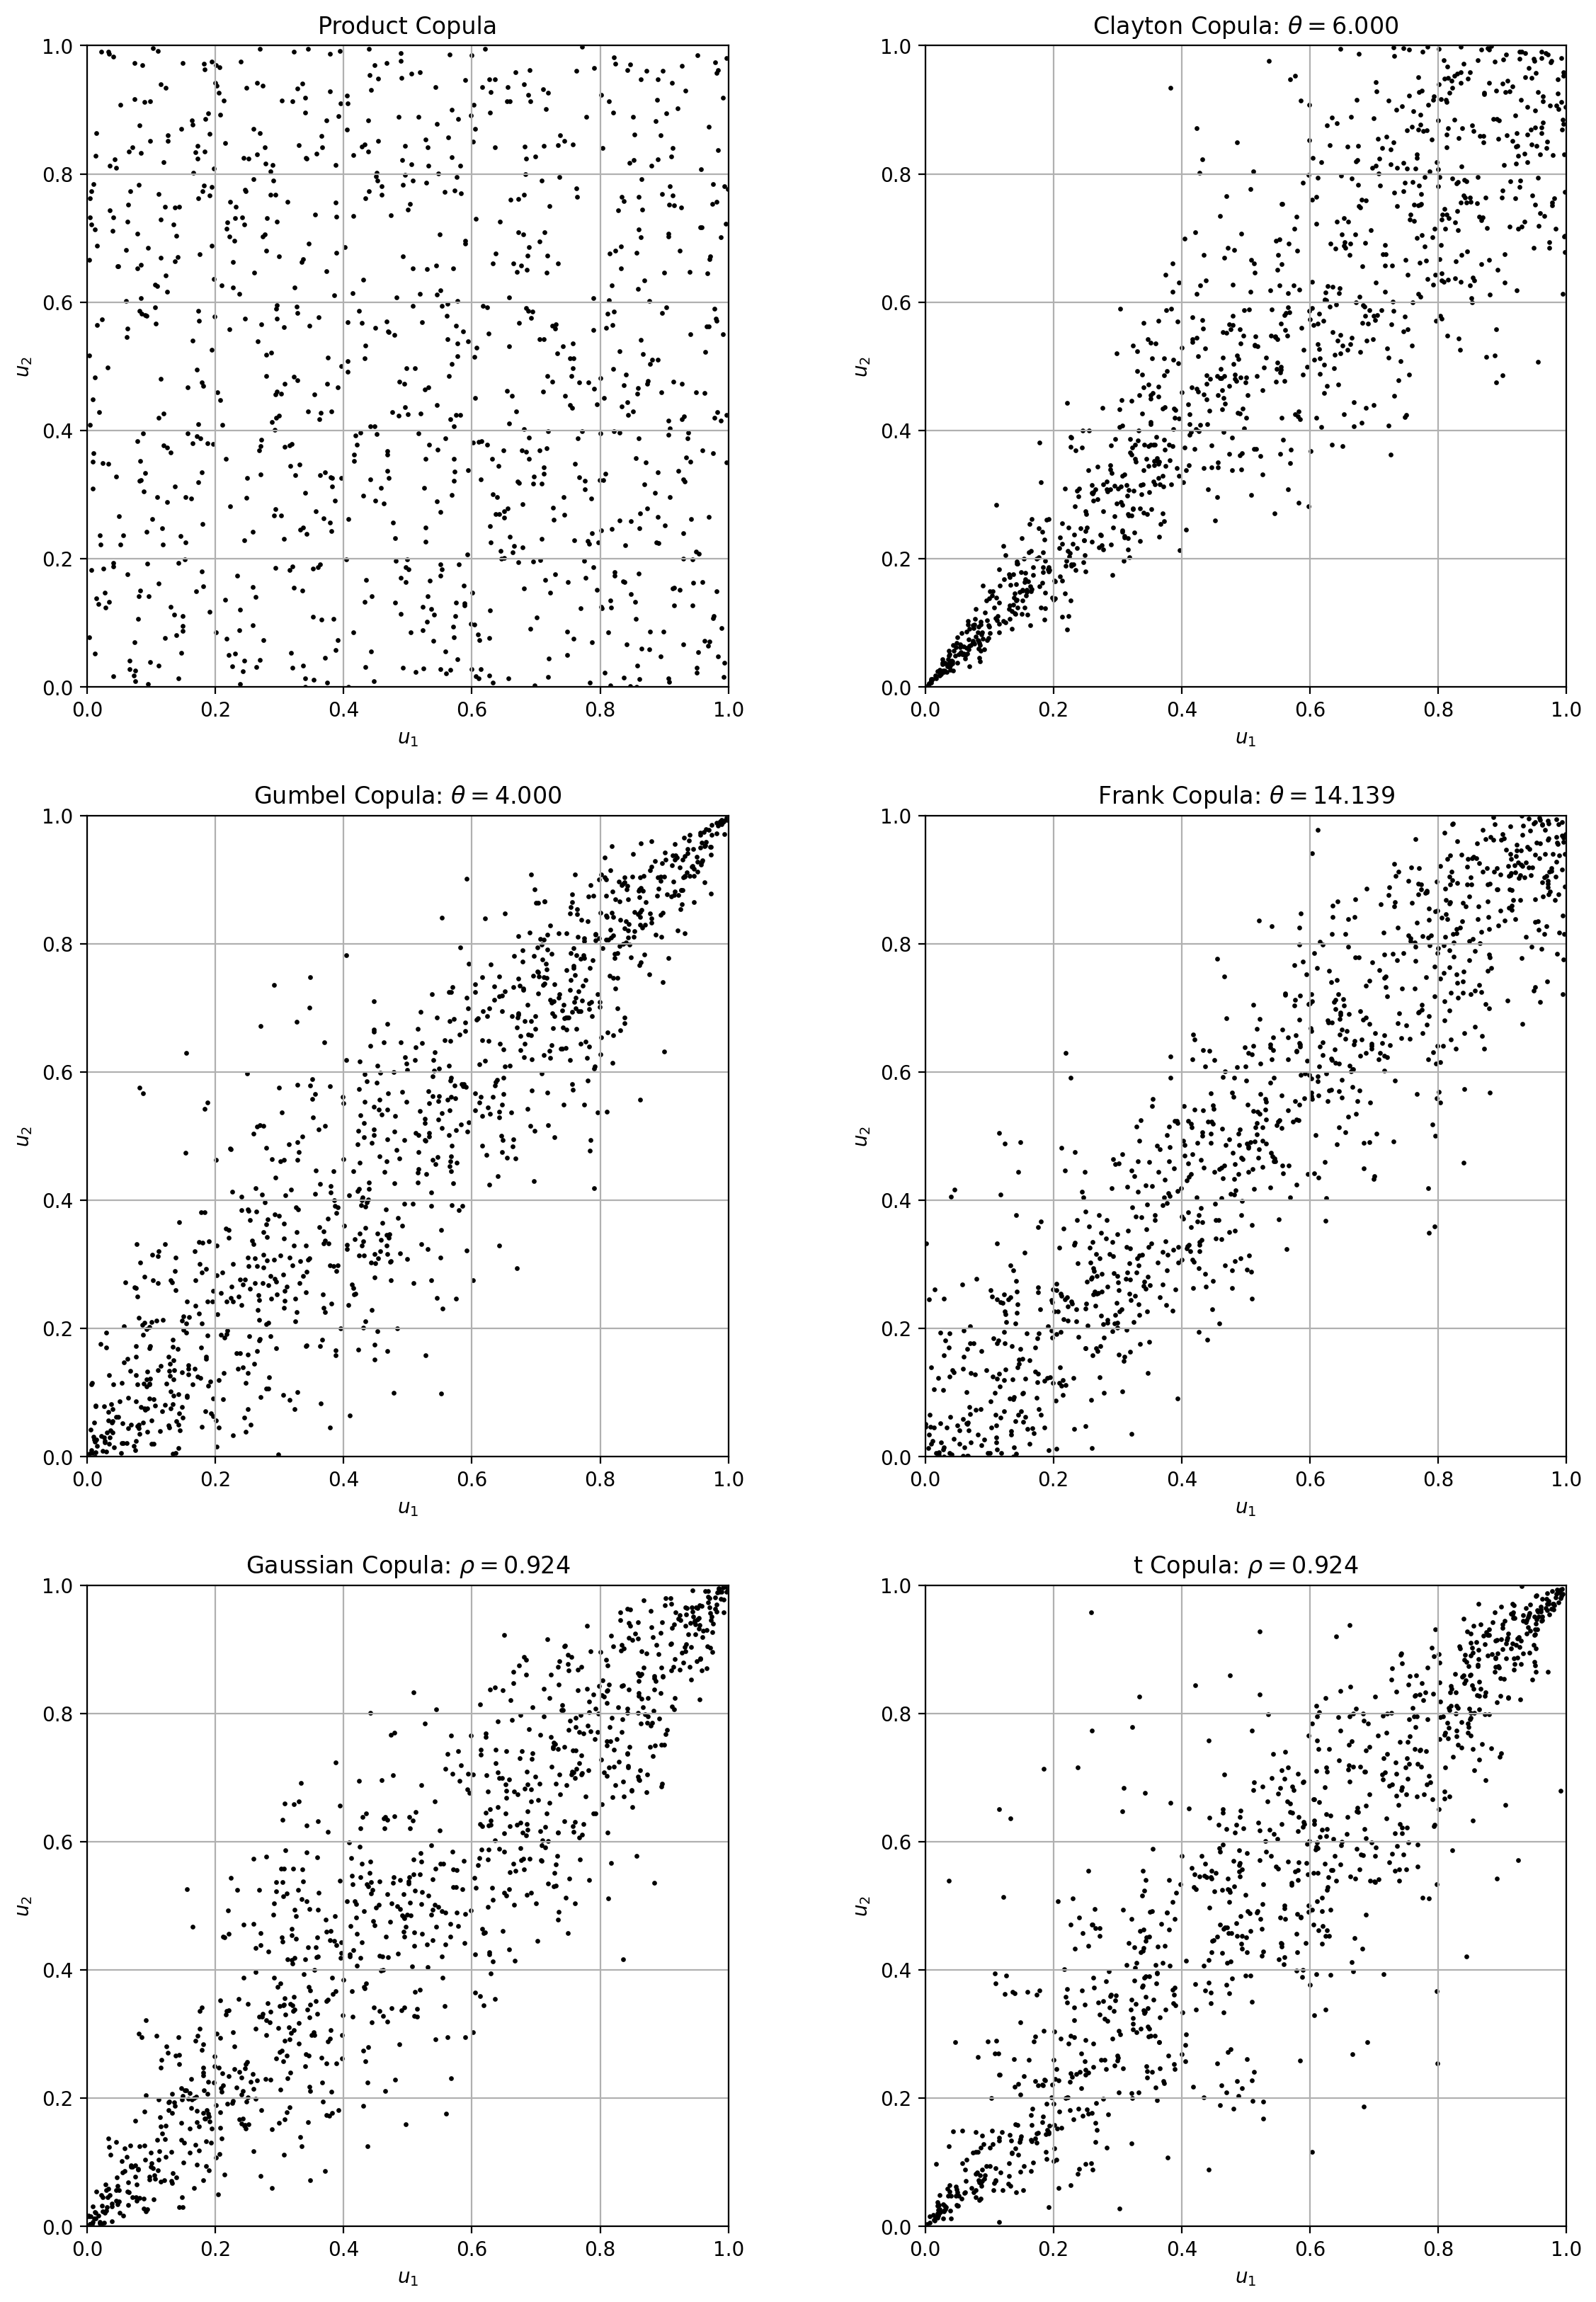

In [9]:
# コピュラの密度関数の対数logc(u1,u2)をプロット
plt.figure(figsize=[14,20], dpi=200)

plt.subplot(321)
plt.scatter(Independence_RVS[:,0], Independence_RVS[:,1], s=2, color='black')
plt.title('Product Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(322)
plt.scatter(Clayton_RVS[:,0], Clayton_RVS[:,1], s=2, color='black')
plt.title('Clayton Copula: ' + r'$\theta=$' + f'{Clayton_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(323)
plt.scatter(Gumbel_RVS[:,0], Gumbel_RVS[:,1], s=2, color='black')
plt.title('Gumbel Copula: ' + r'$\theta=$' + f'{Gumbel_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(324)
plt.scatter(Frank_RVS[:,0], Frank_RVS[:,1], s=2, color='black')
plt.title('Frank Copula: ' + r'$\theta=$' + f'{Frank_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(325)
plt.scatter(Gaussian_RVS[:,0], Gaussian_RVS[:,1], s=2, color='black')
plt.title('Gaussian Copula: ' + r'$\rho=$' + f'{Gaussian_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(326)
plt.scatter(StudentT_RVS[:,0], StudentT_RVS[:,1], s=2, color='black')
plt.title('t Copula: ' + r'$\rho=$' + f'{StudentT_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$u_1$')
plt.ylabel(r'$u_2$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.savefig('Copula_RVS.pdf')
plt.show()

## 周辺分布が標準正規分布の場合の同時分布

In [10]:
# 周辺分布が標準正規分布であると仮定した場合の、各コピュラによって生成される同時分布の確率密度関数を求める
# (x1,x2)平面でのメッシュを作成
n_points = 201
x1 = np.linspace(-3, 3, n_points)
x2 = np.linspace(-3, 3, n_points)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x = np.c_[x1_mesh.flatten(), x2_mesh.flatten()]

# 周辺分布の累積分布関数と確率密度関数を数値計算
phi = sp.stats.norm.pdf(x)
Phi = sp.stats.norm.cdf(x)

# 各インスタンスから同時分布の確率密度関数を数値計算
Independence_g = (Independence.pdf(Phi) * np.prod(phi, axis=1)).reshape(n_points, n_points)
Clayton_g = (Clayton.pdf(Phi) * np.prod(phi, axis=1)).reshape(n_points, n_points)
Gumbel_g = (Gumbel.pdf(Phi) * np.prod(phi, axis=1)).reshape(n_points, n_points)
Frank_g = (Frank.pdf(Phi) * np.prod(phi, axis=1)).reshape(n_points, n_points)
Gaussian_g = (Gaussian.pdf(Phi) * np.prod(phi, axis=1)).reshape(n_points, n_points)
StudentT_g = (StudentT.pdf(Phi) * np.prod(phi, axis=1)).reshape(n_points, n_points)

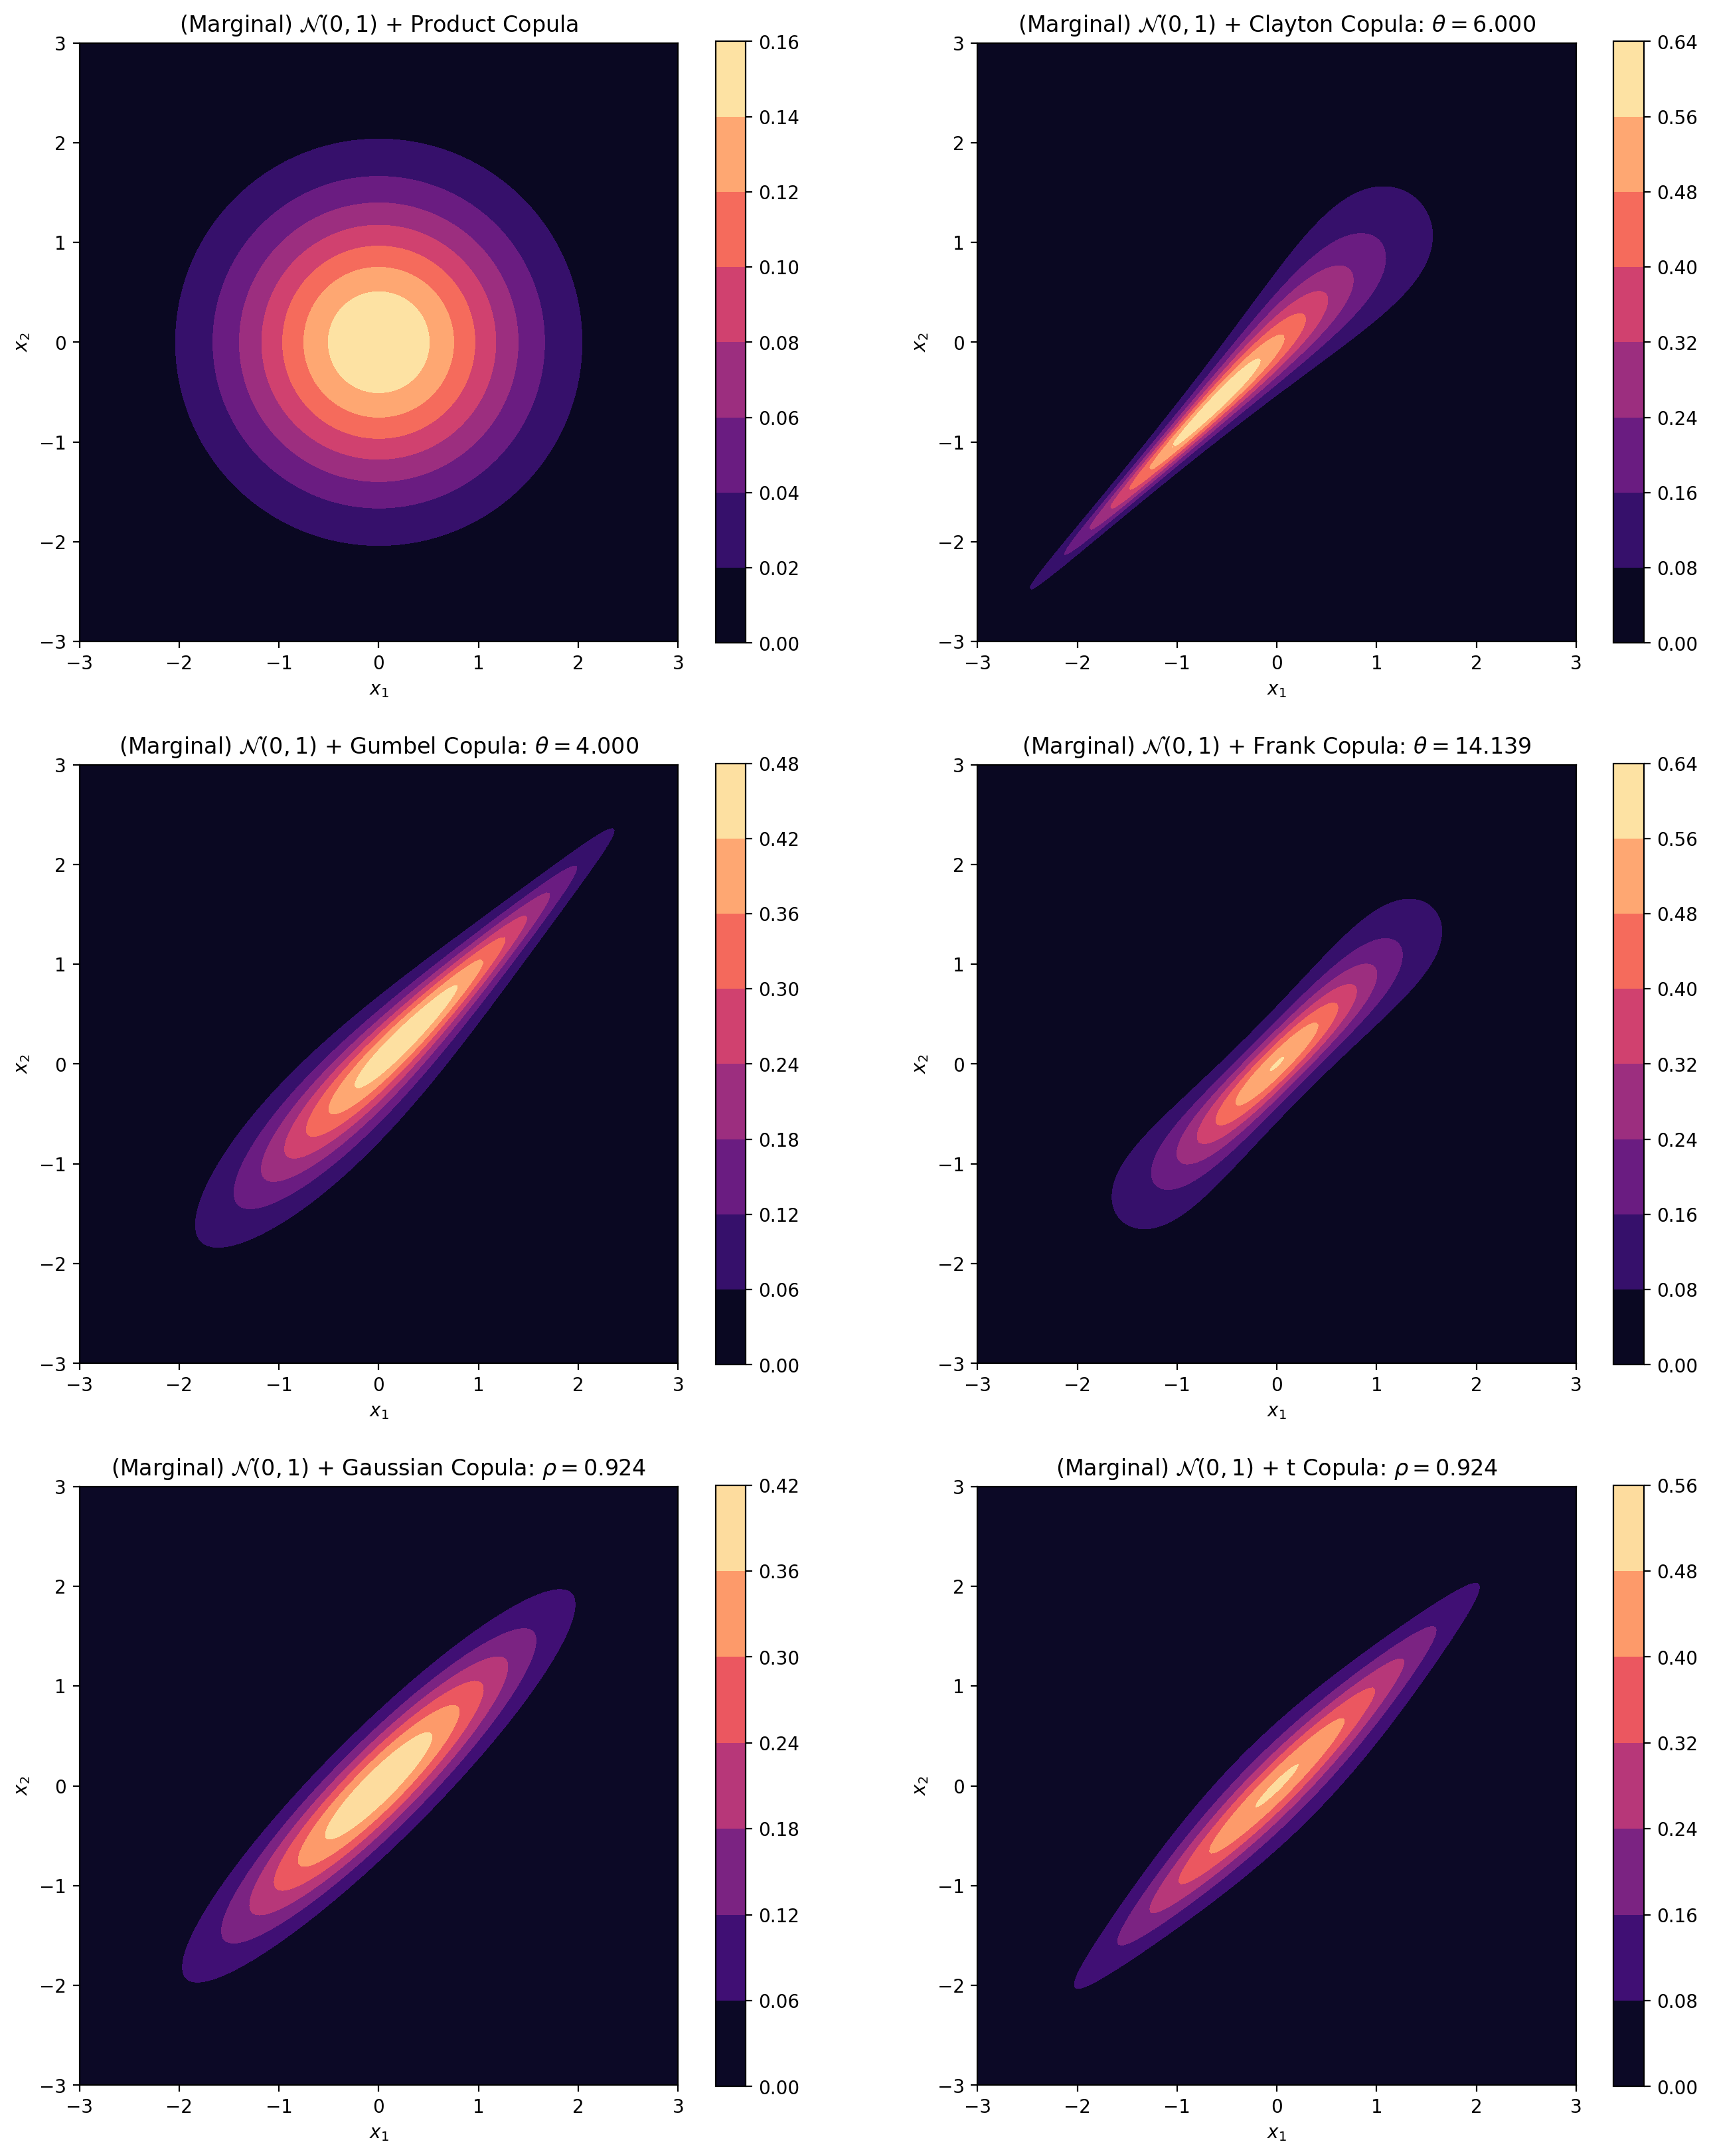

In [11]:
# 同時分布の確率密度関数g(x1,x2)をプロット
plt.figure(figsize=[16,20], dpi=200)

plt.subplot(321)
plt.contourf(x1_mesh, x2_mesh, Independence_g, cmap='magma')
plt.title(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Product Copula')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

plt.subplot(322)
plt.contourf(x1_mesh, x2_mesh, Clayton_g, cmap='magma')
plt.title(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Clayton Copula: ' + r'$\theta=$' + f'{Clayton_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

plt.subplot(323)
plt.contourf(x1_mesh, x2_mesh, Gumbel_g, cmap='magma')
plt.title(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Gumbel Copula: ' + r'$\theta=$' + f'{Gumbel_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

plt.subplot(324)
plt.contourf(x1_mesh, x2_mesh, Frank_g, cmap='magma')
plt.title(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Frank Copula: ' + r'$\theta=$' + f'{Frank_theta:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

plt.subplot(325)
plt.contourf(x1_mesh, x2_mesh, Gaussian_g, cmap='magma')
plt.title(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Gaussian Copula: ' + r'$\rho=$' + f'{Gaussian_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

plt.subplot(326)
plt.contourf(x1_mesh, x2_mesh, StudentT_g, cmap='magma')
plt.title(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 't Copula: ' + r'$\rho=$' + f'{StudentT_corr:.3f}')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

plt.savefig('Joint_PDF.pdf')
plt.show()

## 同時分布の周辺化（クレイトンコピュラ）

In [12]:
# 同時確率密度を関数化
def func_Clayton_g(x1, x2):
    x = np.array([x1,x2])
    PDF = Clayton.pdf(sp.stats.norm.cdf(x)) * np.prod(sp.stats.norm.pdf(x))
    return np.nan_to_num(PDF, 0)

# 周辺確率密度を関数化（同時分布の積分による周辺化）
func_Clayton_f1 = lambda x: sp.integrate.quad(lambda x2: func_Clayton_g(x,x2), -np.inf, np.inf)[0]
func_Clayton_f2 = lambda x: sp.integrate.quad(lambda x1: func_Clayton_g(x1,x), -np.inf, np.inf)[0]

# 各点の周辺確率密度関数を計算
Clayton_f1 = np.array([func_Clayton_f1(x) for x in x1])
Clayton_f2 = np.array([func_Clayton_f2(x) for x in x2])

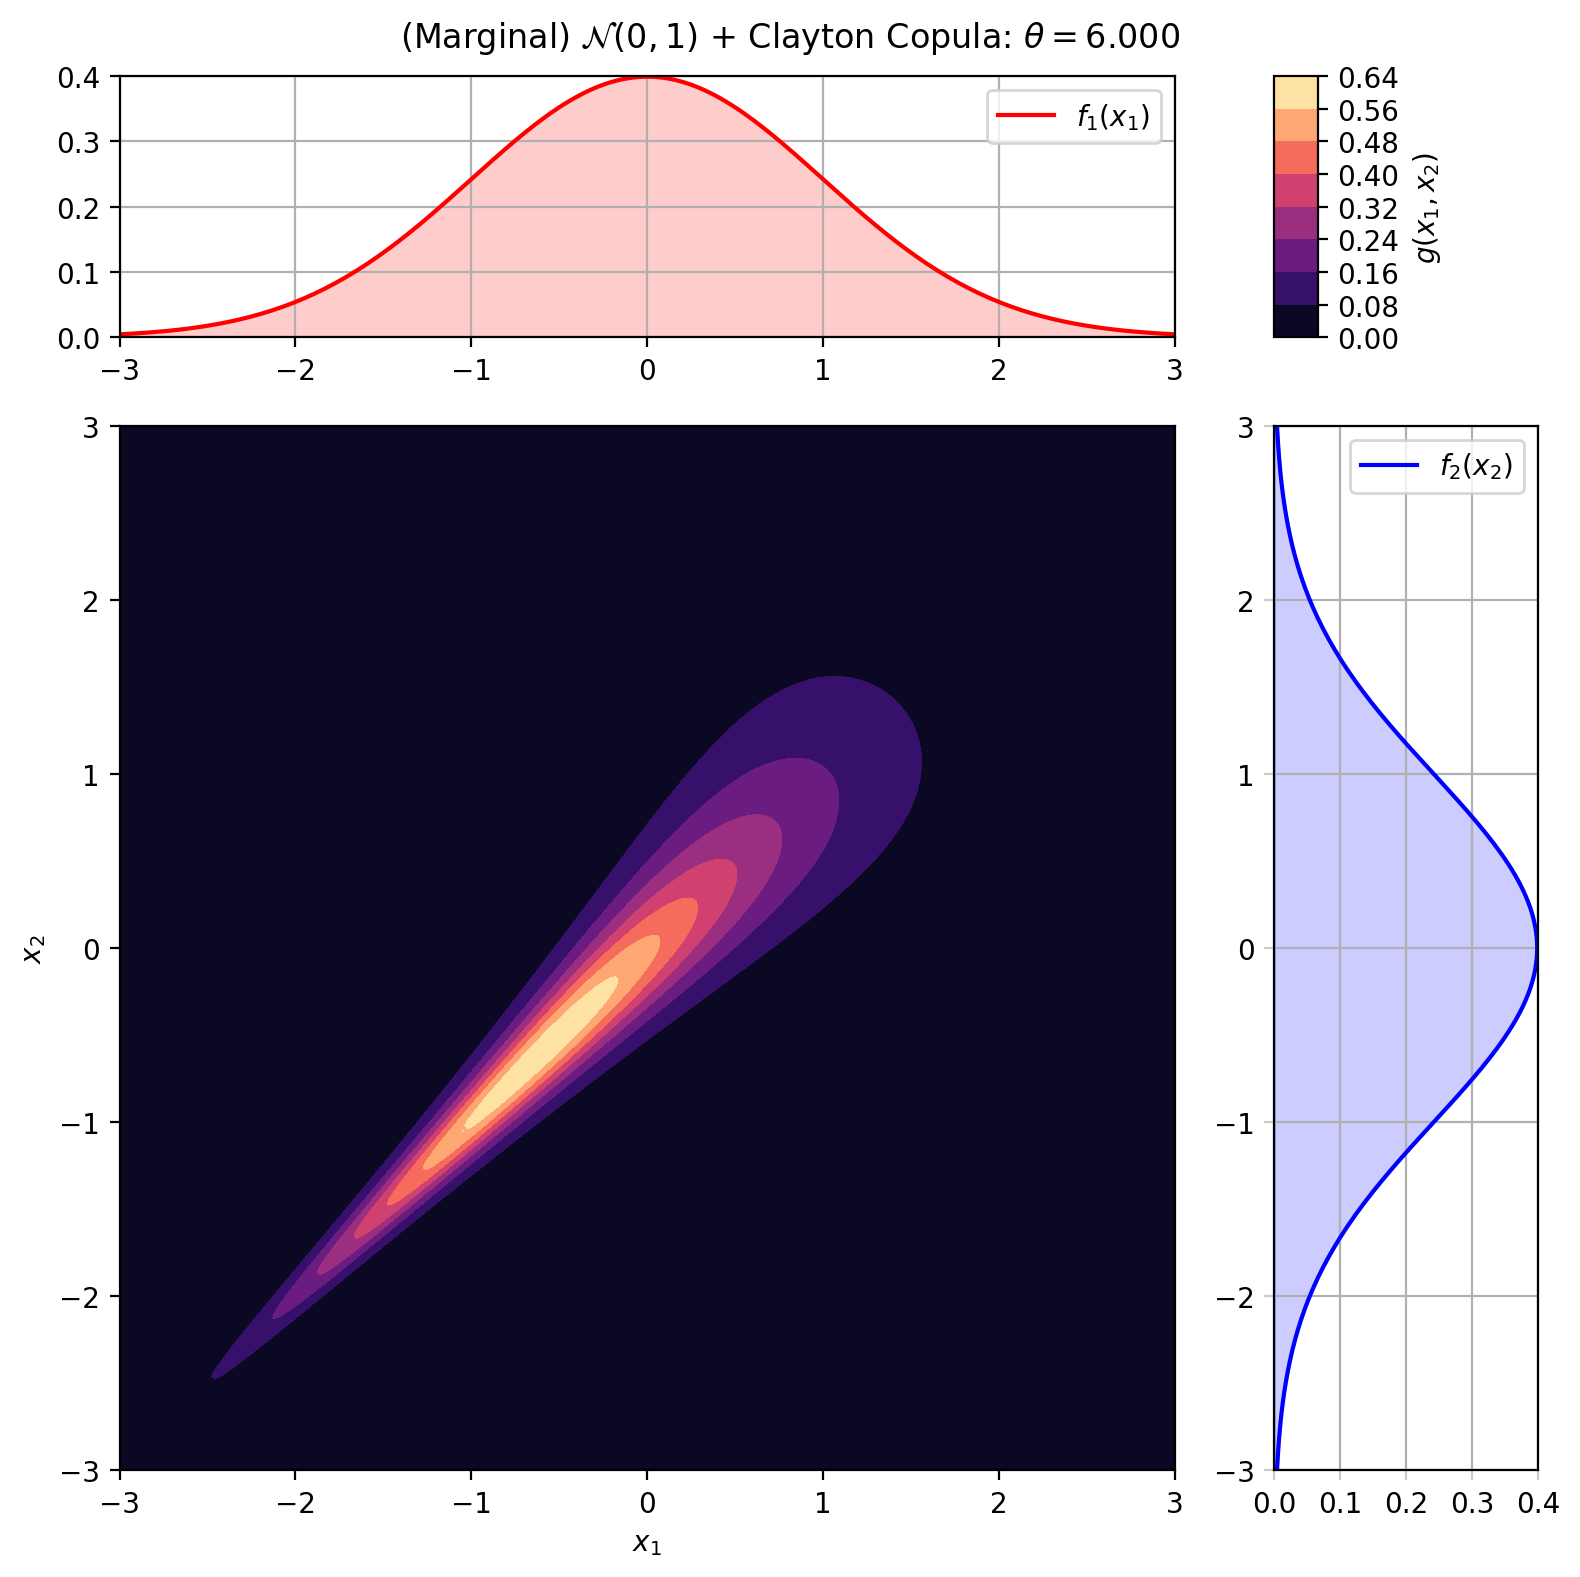

In [13]:
# 同時確率密度関数g(x1,x2)と周辺確率密度関数f1(x1)及びf2(x2)をプロット
# 積分で周辺化した周辺確率密度関数は標準正規分布に一致する
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.contourf(x1_mesh, x2_mesh, Clayton_g, cmap='magma')
ax.set(axisbelow=False)
ax.set(xlabel=r'$x_1$')
ax.set(ylabel=r'$x_2$')
ax.autoscale(tight=True)

ax = plt.subplot(gs[3])
ax.plot(Clayton_f2, x2, 'blue', label=r'$f_2(x_2)$')
ax.fill_betweenx(x2, Clayton_f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set_xlim(0,0.4)
ax.set_xticks([0,0.1,0.2,0.3,0.4])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, Clayton_f1, 'red', label=r'$f_1(x_1)$')
ax.fill_between(x1, Clayton_f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set_ylim(0,0.4)
ax.set_yticks([0,0.1,0.2,0.3,0.4])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel(r'$g(x_1,x_2)$')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Clayton Copula: ' + r'$\theta=$' + f'{Clayton_theta:.3f}')
plt.savefig('Joint_and_Marginal_Clayton.pdf')
plt.show()

## 同時分布の周辺化（ガンベルコピュラ）

In [14]:
# 同時確率密度を関数化
def func_Gumbel_g(x1, x2):
    x = np.array([x1,x2])
    PDF = Gumbel.pdf(sp.stats.norm.cdf(x)) * np.prod(sp.stats.norm.pdf(x))
    return np.nan_to_num(PDF, 0)

# 周辺確率密度を関数化（同時分布の積分による周辺化）
func_Gumbel_f1 = lambda x: sp.integrate.quad(lambda x2: func_Gumbel_g(x,x2), -np.inf, np.inf)[0]
func_Gumbel_f2 = lambda x: sp.integrate.quad(lambda x1: func_Gumbel_g(x1,x), -np.inf, np.inf)[0]

# 各点の周辺確率密度関数を計算
Gumbel_f1 = np.array([func_Gumbel_f1(x) for x in x1])
Gumbel_f2 = np.array([func_Gumbel_f2(x) for x in x2])

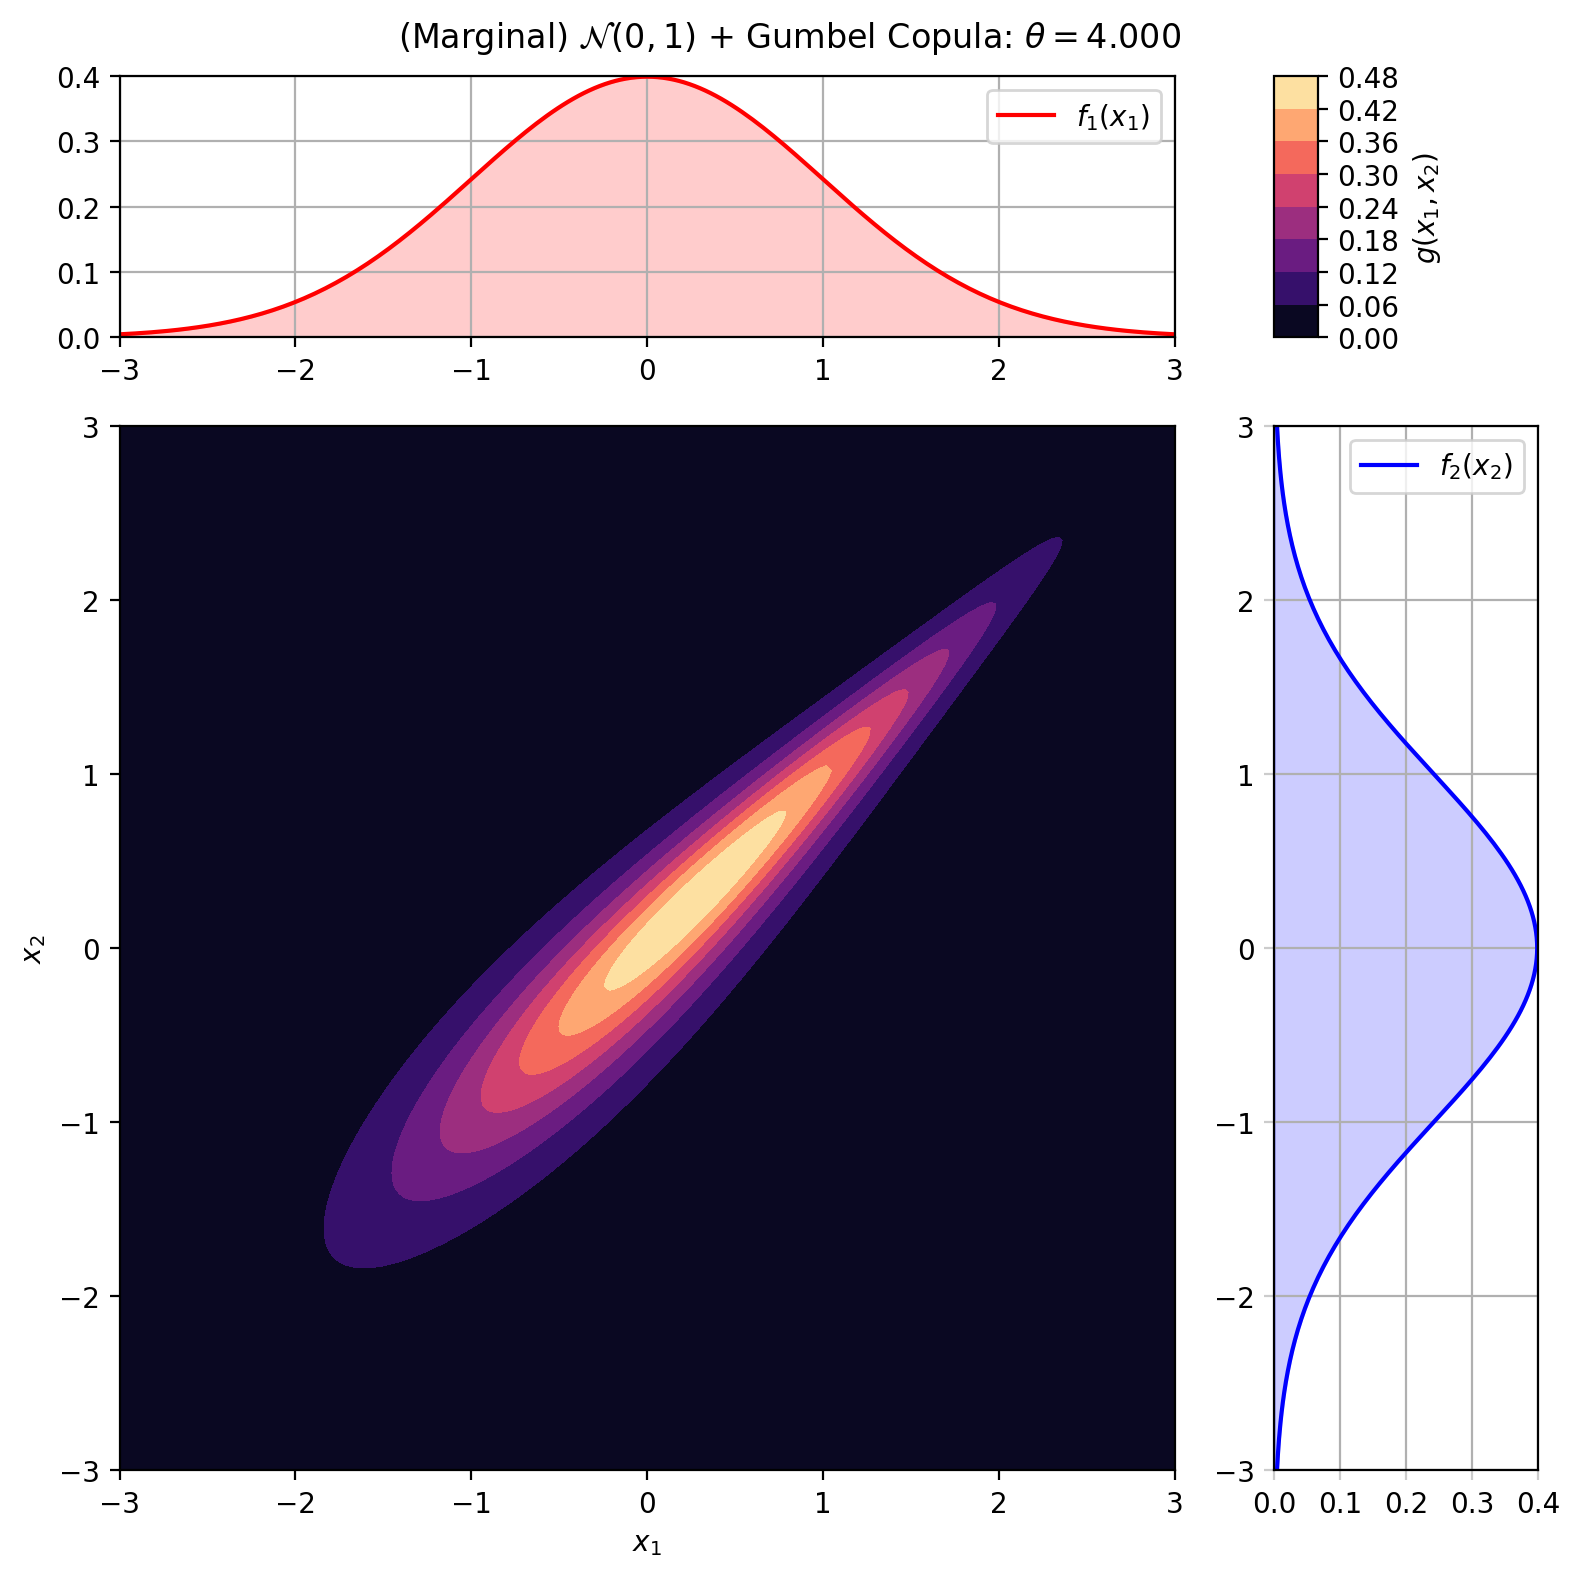

In [15]:
# 同時確率密度関数g(x1,x2)と周辺確率密度関数f1(x1)及びf2(x2)をプロット
# 積分で周辺化した周辺確率密度関数は標準正規分布に一致する
fig = plt.figure(figsize=[8,8], dpi=200)
gs = GridSpec(2, 2, height_ratios=[2,8], width_ratios=[8,2])

ax = plt.subplot(gs[2])
con = ax.contourf(x1_mesh, x2_mesh, Gumbel_g, cmap='magma')
ax.set(axisbelow=False)
ax.set(xlabel=r'$x_1$')
ax.set(ylabel=r'$x_2$')
ax.autoscale(tight=True)

ax = plt.subplot(gs[3])
ax.plot(Gumbel_f2, x2, 'blue', label=r'$f_2(x_2)$')
ax.fill_betweenx(x2, Gumbel_f2, color='blue', alpha=0.2)
ax.tick_params(color="0.8")
ax.autoscale(tight=True)
ax.set_xlim(0,0.4)
ax.set_xticks([0,0.1,0.2,0.3,0.4])
ax.grid()
ax.legend()

ax = plt.subplot(gs[0])
ax.plot(x1, Gumbel_f1, 'red', label=r'$f_1(x_1)$')
ax.fill_between(x1, Gumbel_f1, color='red', alpha=0.2)
ax.autoscale(tight=True)
ax.set_ylim(0,0.4)
ax.set_yticks([0,0.1,0.2,0.3,0.4])
ax.grid()
ax.legend()

ax = plt.subplot(gs[1])
ax.set_visible(False)
cax = make_axes_locatable(ax).append_axes('left', size='20%', pad=0)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel(r'$g(x_1,x_2)$')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle(r'(Marginal) $\mathcal{N}(0,1)$' + ' + ' + 'Gumbel Copula: ' + r'$\theta=$' + f'{Gumbel_theta:.3f}')
plt.savefig('Joint_and_Marginal_Gumbel.pdf')
plt.show()